# Cartoon Detection

Training a model using fastai library to detect whether an image is from an animated movie or not. I collected this dataset by searching for animated movies and picked some random ones.

Blog: https://medium.com/@sairahul/image-classification-with-fastai-763358f5c80

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil

from fastai import *
from fastai.vision import *

In [2]:
path = './is_cartoon/data'

In [3]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(f'{path}', train='train', valid='validation', ds_tfms=tfms, size=128)

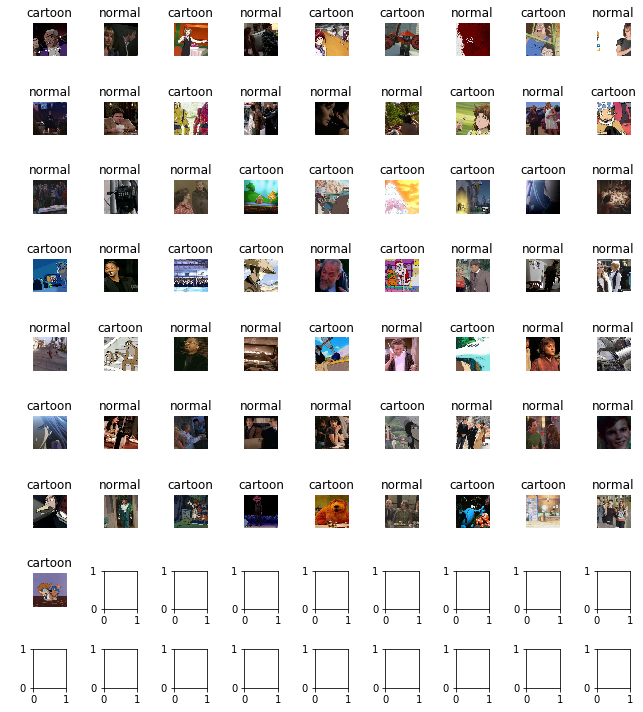

In [6]:
data.show_batch(rows=9)

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(2)

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      0.424157    0.293589    0.901250  (00:13)
2      0.307246    0.252415    0.910000  (00:11)



In [12]:
learn.save('v1')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


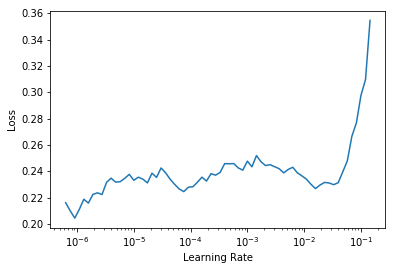

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(5e-6, 5e-4))

Total time: 00:44
epoch  train_loss  valid_loss  accuracy
1      0.262234    0.238864    0.915000  (00:11)
2      0.222891    0.234677    0.921250  (00:11)
3      0.218750    0.223225    0.918750  (00:10)
4      0.199089    0.223086    0.913750  (00:11)



In [15]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


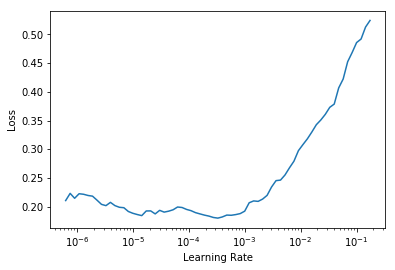

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(4, max_lr=slice(5e-6, 5e-4))

Total time: 00:44
epoch  train_loss  valid_loss  accuracy
1      0.187373    0.212131    0.927500  (00:11)
2      0.167998    0.205701    0.928750  (00:10)
3      0.137721    0.187508    0.933750  (00:11)
4      0.113353    0.182731    0.938750  (00:11)



In [18]:
learn.save('v2')

## Fine tuning with the bigger images !

In [19]:
data_bigger = ImageDataBunch.from_folder(f'{path}', train='train', valid='validation', ds_tfms=tfms, size=255)

In [20]:
learn = create_cnn(data_bigger, models.resnet34, metrics=accuracy)
learn.load('v2')
learn.fit_one_cycle(2)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.117045    0.148249    0.955000  (00:14)
2      0.095810    0.153109    0.955000  (00:14)



In [22]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(5e-6, 5e-4))

Total time: 00:30
epoch  train_loss  valid_loss  accuracy
1      0.072025    0.146903    0.962500  (00:15)
2      0.090145    0.152813    0.960000  (00:14)



In [25]:
learn.save('v3-bigger')

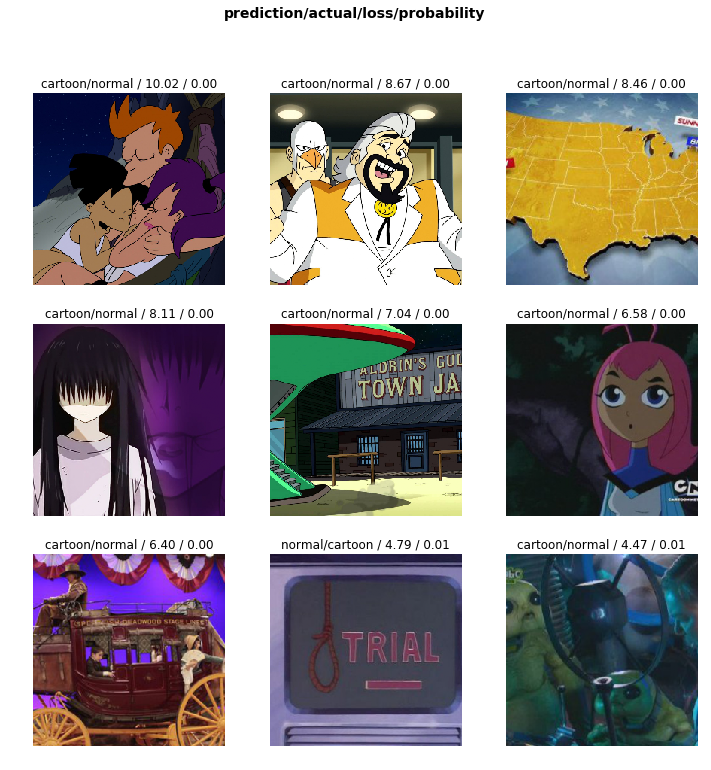

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

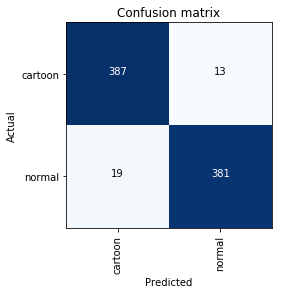

In [27]:
interp.plot_confusion_matrix()